# Safety Leash Impact

In this notebook, we demonstrate the impact of our safety leash waypoint modification method. We show that improves the safety of the UAV under plain PID control.

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

from utilities import get_agent
from environments import OctorotorEnvSelector
from systems.pid_agent import PIDAgent
from multirotor.helpers import DataLog

In [24]:
square_traj = np.array([[100,0,0], [100,100,0], [0,100,0], [0,0,0]])

In [25]:
pid_agent = PIDAgent()

In [26]:
env_selector = OctorotorEnvSelector()

sliding_params = {'steps_u':50, 'scaling_factor':0, 'window_distance':10}
nonsliding_params = {'steps_u':50, 'scaling_factor':0, 'window_distance':1000}

sliding_nominal_env = env_selector.get_env("sliding", sliding_params, [(0,0),(0,0),(0,0)], square_traj)
nonsliding_nominal_env = env_selector.get_env("sliding", nonsliding_params, [(0,0),(0,0),(0,0)], square_traj)
leash_nominal_env = env_selector.get_env("leashed", nonsliding_params, [(0,0),(0,0),(0,0)], square_traj)

sliding_windy_env = env_selector.get_env("sliding", sliding_params, [(0,0),(5,5),(0,0)], square_traj)
nonsliding_windy_env = env_selector.get_env("sliding", nonsliding_params, [(0,0),(5,5),(0,0)], square_traj)
leash_windy_env = env_selector.get_env("leashed", nonsliding_params, [(0,0),(5,5),(0,0)], square_traj)

## Nominal Conditions

### Safety Leash

In [27]:
done = False
state = sliding_nominal_env.reset()
log = DataLog(sliding_nominal_env.base_env.vehicle, sliding_nominal_env.base_env.ctrl,
                  other_vars=('reward',))
while not done:
    action = pid_agent.predict(state, deterministic=True)[0]
    state, reward, done, info = sliding_nominal_env.step(action)
    log.log(reward=reward)
    
log.done_logging()

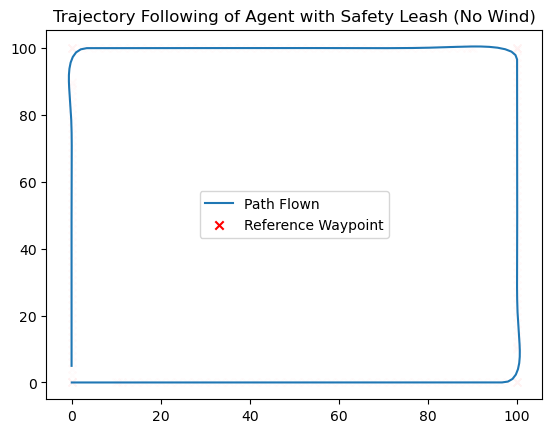

In [28]:
plt.title("Trajectory Following of Agent with Safety Leash (No Wind)")
plt.plot(log.x, log.y, label='Path Flown')
plt.scatter(log.target.position[:,0], log.target.position[:,1], marker='x', color='red', alpha=0.01, label='Reference Waypoint')
leg = plt.legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)

In [29]:
print(f"The total reward of this agent is {np.sum(log.reward)}")
print(f"The total TTE of this agent is {(2500*4-np.sum(log.reward))*5}")

The total reward of this agent is 9441.6337890625
The total TTE of this agent is 2791.8310546875


### Without Safety Leash

Note that the agent flies much faster and only points to the next waypoint in this case.

In [30]:
done = False
state = nonsliding_nominal_env.reset()
log = DataLog(nonsliding_nominal_env.base_env.vehicle, nonsliding_nominal_env.base_env.ctrl,
                  other_vars=('reward',))
while not done:
    action = pid_agent.predict(state, deterministic=True)[0]
    state, reward, done, info = nonsliding_nominal_env.step(action)
    log.log(reward=reward)
    
log.done_logging()

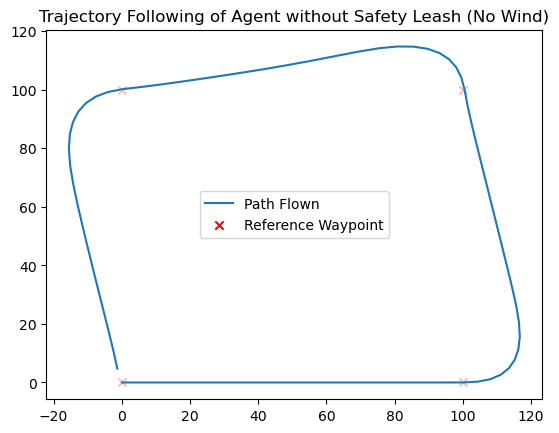

In [31]:
plt.title("Trajectory Following of Agent without Safety Leash (No Wind)")
plt.plot(log.x, log.y, label='Path Flown')
plt.scatter(log.target.position[:,0], log.target.position[:,1], marker='x', color='red', alpha=0.01, label='Reference Waypoint')
leg = plt.legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)

In [32]:
print(f"The total reward of this agent is {np.sum(log.reward)}")
print(f"The total TTE of this agent is {(2500*4-np.sum(log.reward))*5}")

The total reward of this agent is 4678.0830078125
The total TTE of this agent is 26609.5849609375


### ArduPilot Leash

Note that the agent flies much faster and only points to the next waypoint in this case.

In [33]:
done = False
state = leash_nominal_env.reset()
log = DataLog(leash_nominal_env.base_env.vehicle, leash_nominal_env.base_env.ctrl,
                  other_vars=('reward',))
while not done:
    action = pid_agent.predict(state, deterministic=True)[0]
    state, reward, done, info = leash_nominal_env.step(action)
    log.log(reward=reward)
    
log.done_logging()

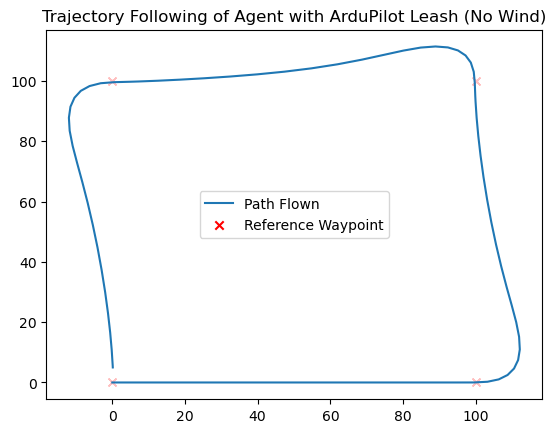

In [34]:
plt.title("Trajectory Following of Agent with ArduPilot Leash (No Wind)")
plt.plot(log.x, log.y, label='Path Flown')
plt.scatter(log.target.position[:,0], log.target.position[:,1], marker='x', color='red', alpha=0.01, label='Reference Waypoint')
leg = plt.legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)

In [35]:
print(f"The total reward of this agent is {np.sum(log.reward)}")
print(f"The total TTE of this agent is {(2500*4-np.sum(log.reward))*5}")

The total reward of this agent is 6530.0361328125
The total TTE of this agent is 17349.8193359375


## Windy Conditions

### Safety Leash

In [36]:
done = False
state = sliding_windy_env.reset()
log = DataLog(sliding_windy_env.base_env.vehicle, sliding_windy_env.base_env.ctrl,
                  other_vars=('reward',))
while not done:
    action = pid_agent.predict(state, deterministic=True)[0]
    state, reward, done, info = sliding_windy_env.step(action)
    log.log(reward=reward)
    
log.done_logging()

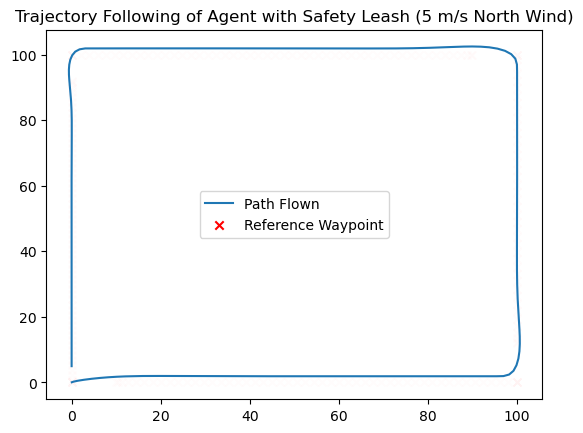

In [37]:
plt.title("Trajectory Following of Agent with Safety Leash (5 m/s North Wind)")
plt.plot(log.x, log.y, label='Path Flown')
plt.scatter(log.target.position[:,0], log.target.position[:,1], marker='x', color='red', alpha=0.01, label='Reference Waypoint')
leg = plt.legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)

In [38]:
print(f"The total reward of this agent is {np.sum(log.reward)}")
print(f"The total TTE of this agent is {(2500*4-np.sum(log.reward))*5}")

The total reward of this agent is 7705.35400390625
The total TTE of this agent is 11473.22998046875


### Without Safety Leash

In [39]:
done = False
state = nonsliding_windy_env.reset()
log = DataLog(nonsliding_windy_env.base_env.vehicle, nonsliding_windy_env.base_env.ctrl,
                  other_vars=('reward',))
while not done:
    action = pid_agent.predict(state, deterministic=True)[0]
    state, reward, done, info = nonsliding_windy_env.step(action)
    log.log(reward=reward)
    
log.done_logging()

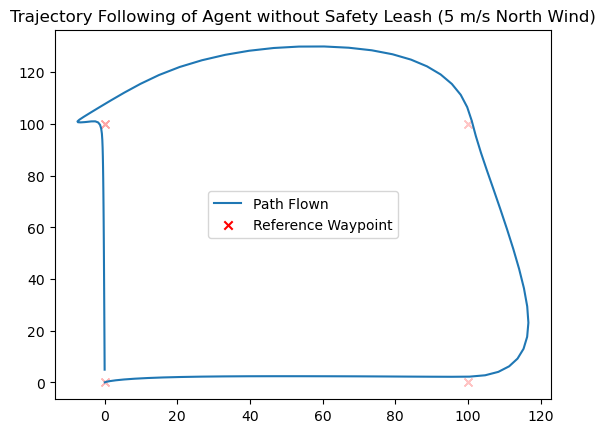

In [40]:
plt.title("Trajectory Following of Agent without Safety Leash (5 m/s North Wind)")
plt.plot(log.x, log.y, label='Path Flown')
plt.scatter(log.target.position[:,0], log.target.position[:,1], marker='x', color='red', alpha=0.01, label='Reference Waypoint')
leg = plt.legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)

In [41]:
print(f"The total reward of this agent is {np.sum(log.reward)}")
print(f"The total TTE of this agent is {(2500*4-np.sum(log.reward))*5}")

The total reward of this agent is 3098.4443359375
The total TTE of this agent is 34507.7783203125


### ArduPilot Leash

In [42]:
done = False
state = leash_windy_env.reset()
log = DataLog(leash_windy_env.base_env.vehicle, leash_windy_env.base_env.ctrl,
                  other_vars=('reward',))
while not done:
    action = pid_agent.predict(state, deterministic=True)[0]
    state, reward, done, info = leash_windy_env.step(action)
    log.log(reward=reward)
    
log.done_logging()

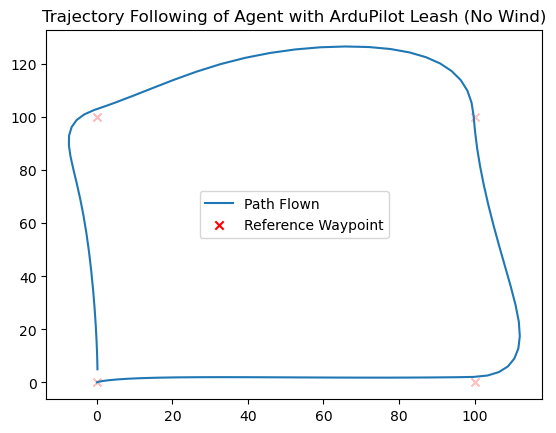

In [43]:
plt.title("Trajectory Following of Agent with ArduPilot Leash (No Wind)")
plt.plot(log.x, log.y, label='Path Flown')
plt.scatter(log.target.position[:,0], log.target.position[:,1], marker='x', color='red', alpha=0.01, label='Reference Waypoint')
leg = plt.legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)

In [44]:
print(f"The total reward of this agent is {np.sum(log.reward)}")
print(f"The total TTE of this agent is {(2500*4-np.sum(log.reward))*5}")

The total reward of this agent is 4162.203125
The total TTE of this agent is 29188.984375
